In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# ดึงข้อมูลหุ้น Tesla (TSLA) ตั้งแต่ปี 2020 - 2024
data = yf.download("TSLA", start="2020-01-01", end="2024-01-01")

# บันทึกข้อมูลเป็น CSV
data.to_csv("tesla_stock_data.csv")

# แสดงตัวอย่างข้อมูล
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [ ]:
from google.colab import files

# ดาวน์โหลดไฟล์ CSV ลงเครื่อง
files.download("tesla_stock_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# โหลดข้อมูลที่เราเก็บไว้ในไฟล์ CSV
data = pd.read_csv("tesla_stock_data.csv")

# แสดงข้อมูลตัวอย่าง
print(data.head())

        Price               Close                High                 Low  \
0      Ticker                TSLA                TSLA                TSLA   
1        Date                 NaN                 NaN                 NaN   
2  2020-01-02   28.68400001525879  28.713333129882812   28.11400032043457   
3  2020-01-03  29.534000396728516  30.266666412353516  29.128000259399414   
4  2020-01-06    30.1026668548584  30.104000091552734  29.333332061767578   

                 Open     Volume  
0                TSLA       TSLA  
1                 NaN        NaN  
2  28.299999237060547  142981500  
3  29.366666793823242  266677500  
4  29.364667892456055  151995000  


In [ ]:
# ตรวจสอบข้อมูลที่หายไป
missing_data = data.isnull().sum()

# แสดงผลลัพธ์
print(missing_data)

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [ ]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข (Numeric Columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# แทนที่ค่าที่หายไปในคอลัมน์ที่เป็นตัวเลขด้วยค่าเฉลี่ย
data_cleaned = data.copy()
data_cleaned[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# แสดงข้อมูลหลังการเติมค่า missing
print(data_cleaned.head())

        Price               Close                High                 Low  \
0      Ticker                TSLA                TSLA                TSLA   
1        Date                 NaN                 NaN                 NaN   
2  2020-01-02   28.68400001525879  28.713333129882812   28.11400032043457   
3  2020-01-03  29.534000396728516  30.266666412353516  29.128000259399414   
4  2020-01-06    30.1026668548584  30.104000091552734  29.333332061767578   

                 Open     Volume  
0                TSLA       TSLA  
1                 NaN        NaN  
2  28.299999237060547  142981500  
3  29.366666793823242  266677500  
4  29.364667892456055  151995000  


In [ ]:
# ตรวจสอบชื่อคอลัมน์ทั้งหมดใน DataFrame
print(data_cleaned.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
# ลบคอลัมน์ที่ไม่จำเป็น
data_cleaned = data_cleaned.drop(columns=['Price'], errors='ignore')

# แสดงข้อมูลที่สะอาดแล้ว
print(data_cleaned.head())

                Close                High                 Low  \
1                 NaN                 NaN                 NaN   
2   28.68400001525879  28.713333129882812   28.11400032043457   
3  29.534000396728516  30.266666412353516  29.128000259399414   
4    30.1026668548584  30.104000091552734  29.333332061767578   
5  31.270666122436523  31.441999435424805  30.224000930786133   

                 Open     Volume  
1                 NaN        NaN  
2  28.299999237060547  142981500  
3  29.366666793823242  266677500  
4  29.364667892456055  151995000  
5  30.760000228881836  268231500  


In [ ]:
# ลบแถวที่มีค่า NaN
data_cleaned = data_cleaned.dropna()

# แสดงข้อมูลที่สะอาดแล้ว
print(data_cleaned.head())

                Close                High                 Low  \
2   28.68400001525879  28.713333129882812   28.11400032043457   
3  29.534000396728516  30.266666412353516  29.128000259399414   
4    30.1026668548584  30.104000091552734  29.333332061767578   
5  31.270666122436523  31.441999435424805  30.224000930786133   
6   32.80933380126953     33.232666015625  31.215333938598633   

                 Open     Volume  
2  28.299999237060547  142981500  
3  29.366666793823242  266677500  
4  29.364667892456055  151995000  
5  30.760000228881836  268231500  
6  31.579999923706055  467164500  


In [ ]:
# แยก Features และ Target
X = data_cleaned[['Open', 'High', 'Low', 'Volume']]  #Features
y = data_cleaned['Close']  #Target

In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็น 80% ฝึกสอน และ 20% ทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# สร้างโมเดล
model = LinearRegression()

# ฝึกโมเดล
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# ทำนายผลลัพธ์
y_pred = model.predict(X_test)

# คำนวณ Mean Squared Error และ R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 11.09864563612933
R^2 Score: 0.9983663024935236


In [ ]:
# ทำนายราคาหุ้นจากข้อมูลใหม่
future_data = [[28.5, 28.7, 28.0, 145000000]]  # ตัวอย่างข้อมูลใหม่ [Open, High, Low, Volume]
future_prediction = model.predict(future_data)
print(f'Predicted Future Price: {future_prediction[0]}')

Predicted Future Price: 28.627447309509623


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


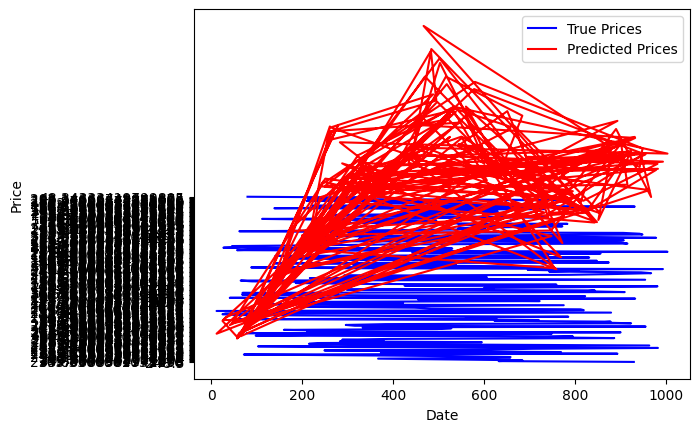

In [ ]:
import matplotlib.pyplot as plt

# เปรียบเทียบผลการทำนายกับราคาจริง
plt.plot(y_test.index, y_test, color='blue', label='True Prices')
plt.plot(y_test.index, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# ทำนายหลายวันข้างหน้า
future_data_multiple = [
    [28.5, 28.7, 28.0, 145000000],  # วันแรก
    [29.0, 29.2, 28.5, 150000000],  # วันที่สอง
    [30.0, 30.3, 29.5, 155000000],  # วันที่สาม
]
future_predictions = model.predict(future_data_multiple)
print(f'Predicted Future Prices: {future_predictions}')


Predicted Future Prices: [28.62744731 29.12460926 30.20791542]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

joblib.dump(model, 'stock_model.pkl')

['stock_model.pkl']

In [ ]:
from google.colab import files

files.download('stock_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>